# 3 - Ensembles de données disponibles dans Sklearn
<h1>Solutions</h1>

## Exercices

### Exercice 1
```sklearn``` contient un _ensemble de données sur le vin_.

- Trouvez et chargez cet ensemble de données
- Pouvez-vous trouver une description ?
- Quels sont les noms des classes ?
- Quelles sont les caractéristiques ?
- Où se trouvent les données et les données étiquetées ?

In [1]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
print(wine.target_names)
print(wine.feature_names)

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
data = wine.data
labelled_data = wine.target

### Exercice 2 :
Créez un diagramme de dispersion des caractéristiques ```cendre``` et ```couleur_intensit``` de l'ensemble de données sur le vin.

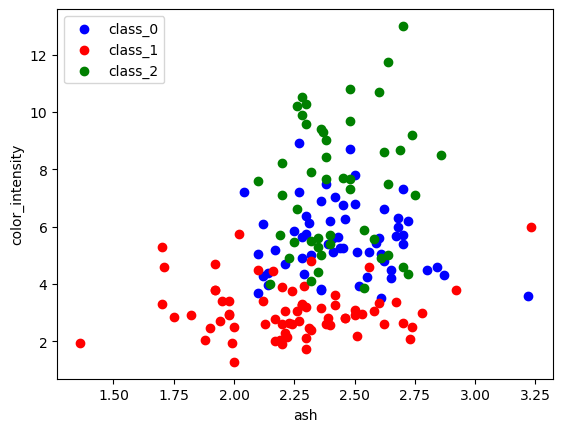

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt

wine = datasets.load_wine()

features = 'ash', 'color_intensity'
features_index = [wine.feature_names.index(features[0]),
                  wine.feature_names.index(features[1])]


colors = ['blue', 'red', 'green']

for label, color in zip(range(len(wine.target_names)), colors):
    plt.scatter(wine.data[wine.target==label, features_index[0]], 
                wine.data[wine.target==label, features_index[1]],
                label=wine.target_names[label],
                c=color)

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='upper left')
plt.show() # wine dataset scatter plot

### Exercice 3 :
Créez une matrice de dispersion des caractéristiques de l'ensemble de données sur le vin.

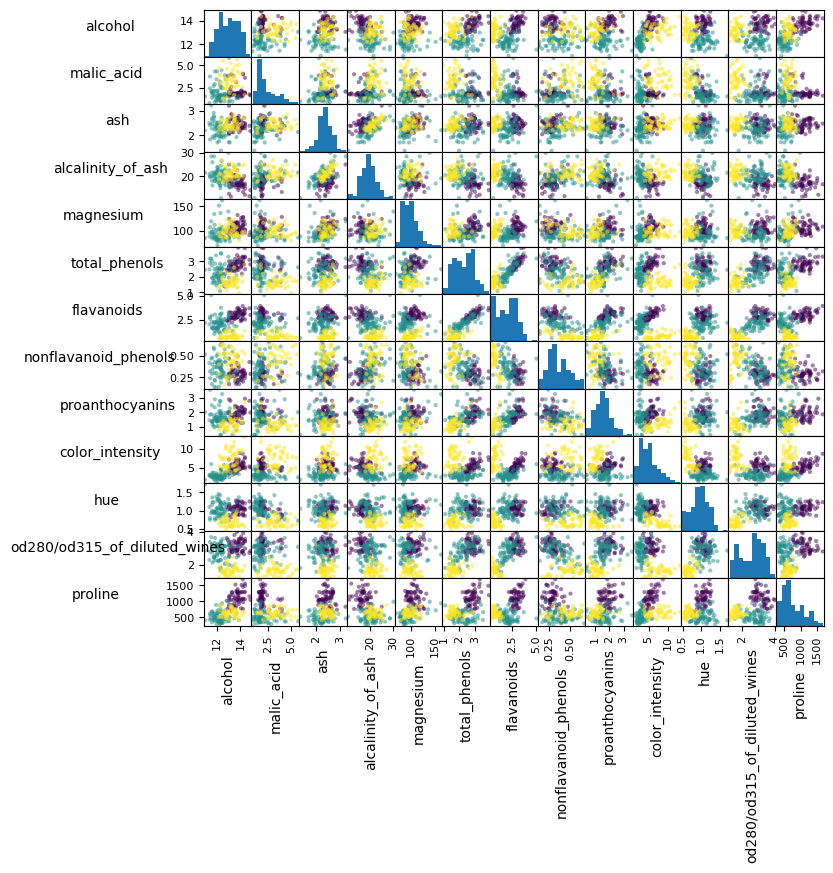

In [5]:
# scatter matrix of wine data set
import pandas as pd
from sklearn import datasets

wine = datasets.load_wine()
def rotate_labels(df, axes):
    """ changing the rotation of the label output, 
    y labels horizontal and x labels vertical """
    n = len(df.columns)
    for x in range(n):
        for y in range(n):
            # to get the axis of subplots
            ax = axs[x, y]
            # to make x axis name vertical  
            ax.xaxis.label.set_rotation(90)
            # to make y axis name horizontal 
            ax.yaxis.label.set_rotation(0)
            # to make sure y axis names are outside the plot area
            ax.yaxis.labelpad = 50

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
axs = pd.plotting.scatter_matrix(wine_df, 
                                 c=wine.target, 
                                 figsize=(8, 8),
                                );

rotate_labels(wine_df, axs)

### Exercice 4 :
Récupérer le jeu de données des visages Olivetti et visualiser les visages.

In [6]:
from sklearn.datasets import fetch_olivetti_faces
# fetch the faces data
faces = fetch_olivetti_faces()
faces.keys()
n_samples, n_features = faces.data.shape
print((n_samples, n_features))

(400, 4096)


In [7]:
import numpy as np
np.sqrt(4096)
print(np.all(faces.images.reshape((400, 4096)) == faces.data))

True


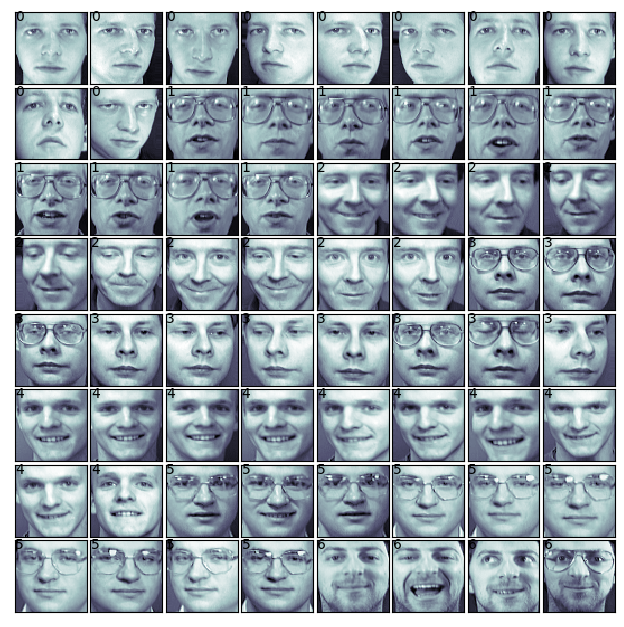

In [8]:
# visualisation of faces dataset
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(faces.target[i]))

[Suivant](4_representation_visualisation_donnees.ipynb)